In [77]:
#operates on afm_songs_prod and local spotify data to populate afm_songs_cov

import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


from creds import rds_username, rds_password, rds_url, rds_port, rds_db, ip_key
conn = psycopg2.connect(
        host=rds_url,
        port=rds_port,
        dbname=rds_db,
        user=rds_username,
        password=rds_password)

squery = "select * from afm_songs_prod"
songs = sqlio.read_sql_query(squery, conn)

In [78]:
songs.shape

(78, 9)

In [79]:
songs.to_csv("~/github/jukebox/data-science/songs.csv")

In [4]:
features = ['danceability', 'energy', 'key', 'loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

artist_songs = pd.read_csv("/Users/ziv.e/github/jukebox/data-science/data/artist_songs.csv")
genre_songs = pd.read_csv("/Users/ziv.e/github/jukebox/data-science/data/genre_songs.csv")

In [5]:
artist_features = artist_songs.groupby(['artist']).mean()

In [6]:
genre_features = genre_songs.groupby(['playlist_genre']).mean()
genre_features = genre_features[features]
genre_features['genre'] = genre_features.index

In [7]:
songs_out = pd.merge(songs,genre_features, how='left', on='genre')

In [8]:
songs_out= pd.merge(songs_out,artist_features[features], how='left', on = 'artist', suffixes = ("", "_artist"))

In [9]:
songs_out= pd.merge(songs_out,artist_features[features], how='left', left_on = 'dna_artist', right_on='artist', suffixes = ("_genre", "_dna_artist"))

In [10]:
songs_out.to_csv("/Users/ziv.e/github/jukebox/data-science/data/songs_cov.csv")

In [17]:
X = songs_out[songs_out.columns[-27:]]

In [34]:
X_embedded = TSNE(n_components=2).fit_transform(X)
df_subset = pd.DataFrame(X_embedded, columns=["tsne-2d-one","tsne-2d-two"])
df_subset['genre'] = songs_out['genre']

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

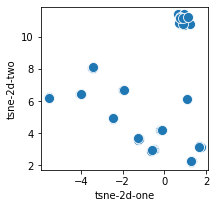

In [82]:

plt.figure(figsize=(3,3))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=1,
    s=100
)

In [71]:
for i,r in songs_out.iterrows():
    if not r['run_id'] in songs['run_id'].values:
        write2database(conn,add_song, r)

In [69]:
add_song = """ INSERT INTO afm_songs_cov VALUES ( %s, %s, %s, %s,%s, %s, %s, %s, %s, %s,%s, %s, %s, %s, %s, %s,%s, %s, %s, %s, %s, %s,%s, %s, %s, %s, %s, %s,%s, %s, %s, %s, %s, %s, %s, %s)"""

In [70]:
def write2database(conn, table, data):
	cur = conn.cursor()
	cur.execute(table, (data))
	conn.commit()
	cur.close()

In [ ]:
for i,r in songs_out.iterrows():
    write2database(conn,add_song, r)

In [22]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import numpy as np
import pandas as pd
#from sklearn.manifold import TSNE


from creds import rds_username, rds_password, rds_url, rds_port, rds_db, ip_key
conn = psycopg2.connect(
        host=rds_url,
        port=rds_port,
        dbname=rds_db,
        user=rds_username,
        password=rds_password)

squery = "select * from afm_songs_cov"
songs = sqlio.read_sql_query(squery, conn)

In [15]:
def write2database(conn, table, data):
	cur = conn.cursor()
	cur.execute(table, (data))
	conn.commit()
	cur.close()

add_song = """ INSERT INTO afm_songs_prod VALUES (now(), %s, %s, %s, %s, %s, %s, %s, %s)"""

for i,r in songs.iterrows():
    data4db = (r['song_id'], r['run_id'], r['genre'], r['artist'], r['dna'], r['dna_artist'], r['url'],'batch2')
    write2database(conn, add_song, data4db)
        
    

In [27]:
squery = "select * from afm_path"
songs = sqlio.read_sql_query(squery, conn)

In [28]:
songs

,time_stamp,song_id,user_id,song_order,pref_novelty,pref_happy,pref_danceable,pref_artifical,pref_upbeat
0,2021-06-10 02:55:26.335206,IjIiaSKB7k8j2XMW_kxAoKg,8558532FC2B480E5,1.0,2,0,0,0.0,0
1,2021-06-10 02:55:56.757642,RFZ81ED1tkdEpu0i_ydqNnp,8558532FC2B480E5,2.0,2,0,0,0.0,0
2,2021-06-10 04:00:53.504425,RFZ81ED1tkdEpu0i_jdNsso,18212B93F94F3A43,1.0,2,0,0,0.0,0
3,2021-06-10 04:00:57.855425,IjIiaSKB7k8j2XMW_0gscVU,18212B93F94F3A43,1.0,2,0,0,0.0,0
4,2021-06-10 04:01:28.997158,JeD86nnJJDiRWFMe_RgvVpH,18212B93F94F3A43,2.0,0,1,1,0.0,0
5,2021-06-10 04:01:54.126190,RxCL2108mC0yuZ5e_SHklTr,18212B93F94F3A43,3.0,0,1,1,0.0,0
6,2021-06-10 04:02:19.259828,wHml1oMlJdwlASWY_eg1qkS,18212B93F94F3A43,4.0,2,1,1,0.0,0
7,2021-06-10 04:04:37.701135,RFZ81ED1tkdEpu0i_C7jQCk,18212B93F94F3A43,1.0,2,0,0,0.0,0
8,2021-06-10 04:04:54.979018,IjIiaSKB7k8j2XMW_0gscVU,18212B93F94F3A43,1.0,2,0,0,0.0,0
9,2021-06-10 04:05:13.460614,IjIiaSKB7k8j2XMW_T9wTse,18212B93F94F3A43,1.0,2,0,0,0.0,0


In [35]:
squery = "select * from afm_ratings_prod"
songs = sqlio.read_sql_query(squery, conn)

In [36]:
songs

,time_stamp,song_id,user_id,question,answer,sequence,elapsed,meta
0,2021-06-10 02:04:48.291136,RM6uxrsEzNi3sVse_zEXUep,8558532FC2B480E5,How happy is this song?,4,0:16,0.0,batch2
1,2021-06-10 02:05:16.158831,RM6uxrsEzNi3sVse_zEXUep,8558532FC2B480E5,How much did you like this song?,2,0:24,0.0,batch2
2,2021-06-10 02:05:23.107120,wHml1oMlJdwlASWY_eg1qkS,8558532FC2B480E5,How instrumental is this song?,1,0:06,0.0,batch2
3,2021-06-10 02:05:26.075240,wHml1oMlJdwlASWY_eg1qkS,8558532FC2B480E5,How clear are the lyrics?,1,0:09,0.0,batch2
4,2021-06-10 02:06:18.126801,IjIiaSKB7k8j2XMW_T9wTse,8558532FC2B480E5,How instrumental is this song?,2,0:01,1.0,batch2
5,2021-06-10 02:06:24.491985,IjIiaSKB7k8j2XMW_T9wTse,8558532FC2B480E5,How artificial is this song?,4,0:04,2.0,batch2
6,2021-06-10 02:45:59.936924,IjIiaSKB7k8j2XMW_EAHFa2,8558532FC2B480E5,How much did you like this song?,2,0:03,1.0,batch2
7,2021-06-10 02:46:08.320790,IjIiaSKB7k8j2XMW_EAHFa2,8558532FC2B480E5,How artificial is this song?,5,0:06,2.0,batch2
8,2021-06-10 04:00:52.589749,IjIiaSKB7k8j2XMW_0gscVU,18212B93F94F3A43,How happy is this song?,4,0:16,1.0,batch2
9,2021-06-10 04:01:24.405993,IjIiaSKB7k8j2XMW_0gscVU,18212B93F94F3A43,How instrumental is this song?,4,0:20,2.0,batch2
